# Challenge Kaggle - Visual In-Depth EDA – VinBigData Competition Data

    Neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import pydicom
import os
import glob
import pickle
import pandas as pd
import csv
from pathlib import Path
from IPython.display import HTML
from os import listdir, mkdir
import imageio
from IPython import display
from sklearn.metrics import roc_auc_score, roc_curve, auc

import tensorflow as tf
from keras.models import load_model
from keras import layers 
from keras.layers import Concatenate,Input, Dense, Activation, ZeroPadding2D, \
BatchNormalization, Flatten, Conv2D 
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, \
GlobalAveragePooling2D 
from keras.models import Model, Sequential 
from keras.preprocessing import image 
from keras.utils import layer_utils 
from keras.utils.data_utils import get_file 
from keras.applications.imagenet_utils import preprocess_input 
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Construct the model

In [2]:
def KerasModel(input_shape):  
    NumClass = 15
    X_input  = Input(input_shape)
     
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(40, (3, 3), strides = (1, 1), name = 'conv0')(X)    
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    ##
    X = Conv2D(24, (3, 3), strides = (1, 1), name = 'conv1')(X)    
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)  
    ##
    
    ##
    X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv2')(X)    
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool2')(X)  
    ##    

    ##   New layer
    X = Conv2D(8, (3, 3), strides = (1, 1), name = 'conv3')(X)    
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool3')(X)  
    ##    


    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dropout(0.5)(X)
    X = Dense(NumClass, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='KerasModel')
    
    return model 

In [5]:
# Construct the model
ModelPulm = KerasModel(Xt[0].shape) # input dimention
# Run the model
ModelPulm.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [6]:
ModelPulm.summary()

Model: "KerasModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 256, 256, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 254, 254, 40)      1120      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 254, 254, 40)      160       
_________________________________________________________________
activation (Activation)      (None, 254, 254, 40)      0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 127, 127, 40)      0         
_________________________________________________________________
conv1 (Conv2D)               (None, 125, 125, 24)      8

# Load data

In [3]:
number_run = 0
Path         =  "C:/Users/Felipe/Documents/DataSets/Pulmonary/Data_pulmonary" + str(number_run) + ".pckl"
f = open(Path, 'rb')
[Xt,Y] = pickle.load(f)

[1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.]


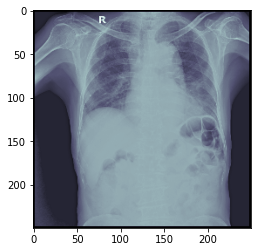

In [4]:
plt.imshow(Xt[0,:,:,1],cmap=plt.cm.bone)
print(Y[0])

# Load Model

In [ ]:
# load model
ModelPulm = load_model('C:/Users/Felipe/Documents/DataSets/modelos/ModelPulm-2_.h5') 

# Run the all model

Epoch 1/5
16/16 [==============================] - 94s 6s/step - loss: 0.7410 - accuracy: 0.1934
Epoch 2/5
16/16 [==============================] - 91s 6s/step - loss: 0.5029 - accuracy: 0.3104
Epoch 3/5
16/16 [==============================] - 93s 6s/step - loss: 0.4603 - accuracy: 0.3908
Epoch 4/5
16/16 [==============================] - 92s 6s/step - loss: 0.4310 - accuracy: 0.4296
Epoch 5/5
16/16 [==============================] - 91s 6s/step - loss: 0.4214 - accuracy: 0.4657


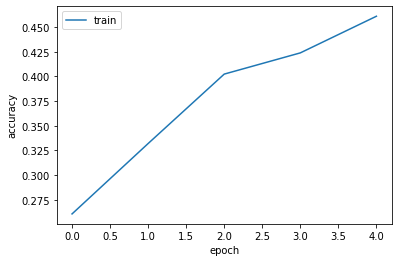

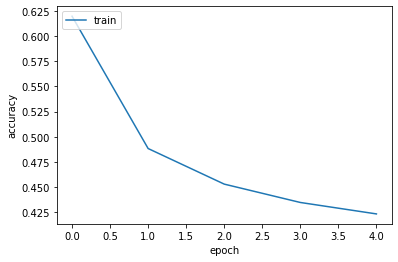

Epoch 1/5
16/16 [==============================] - 92s 6s/step - loss: 0.4339 - accuracy: 0.4482
Epoch 2/5
16/16 [==============================] - 91s 6s/step - loss: 0.4267 - accuracy: 0.4307
Epoch 3/5
16/16 [==============================] - 92s 6s/step - loss: 0.4177 - accuracy: 0.4258
Epoch 4/5
16/16 [==============================] - 92s 6s/step - loss: 0.4064 - accuracy: 0.4961
Epoch 5/5
16/16 [==============================] - 91s 6s/step - loss: 0.3962 - accuracy: 0.5049


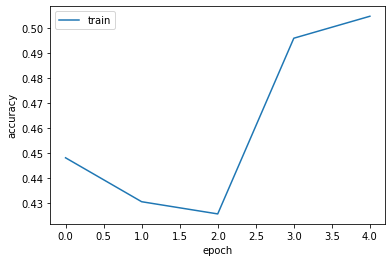

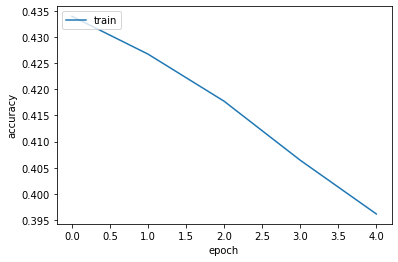

Epoch 1/5
16/16 [==============================] - 93s 6s/step - loss: 0.4083 - accuracy: 0.4258
Epoch 2/5
16/16 [==============================] - 91s 6s/step - loss: 0.4005 - accuracy: 0.4707
Epoch 3/5
16/16 [==============================] - 91s 6s/step - loss: 0.3887 - accuracy: 0.4512
Epoch 4/5
16/16 [==============================] - 91s 6s/step - loss: 0.3833 - accuracy: 0.4590
Epoch 5/5
16/16 [==============================] - 91s 6s/step - loss: 0.3819 - accuracy: 0.4707


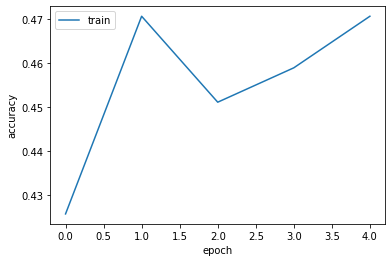

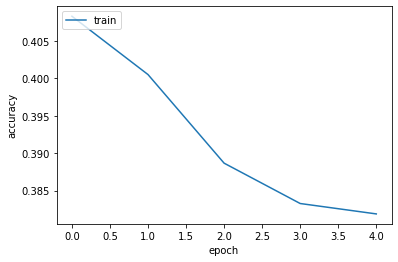

Epoch 1/5
16/16 [==============================] - 91s 6s/step - loss: 0.4032 - accuracy: 0.4756
Epoch 2/5
16/16 [==============================] - 91s 6s/step - loss: 0.3921 - accuracy: 0.4902
Epoch 3/5
16/16 [==============================] - 92s 6s/step - loss: 0.3873 - accuracy: 0.4990
Epoch 4/5
16/16 [==============================] - 92s 6s/step - loss: 0.3761 - accuracy: 0.5059
Epoch 5/5
16/16 [==============================] - 91s 6s/step - loss: 0.3670 - accuracy: 0.4980


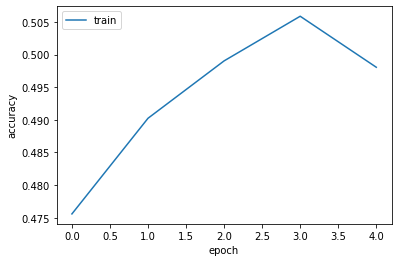

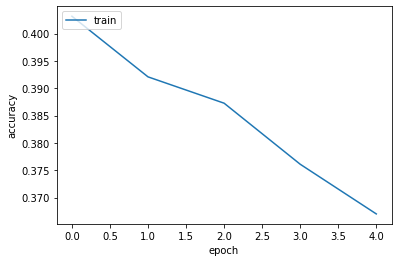

Epoch 1/5
16/16 [==============================] - 91s 6s/step - loss: 0.3978 - accuracy: 0.4893
Epoch 2/5
16/16 [==============================] - 91s 6s/step - loss: 0.3870 - accuracy: 0.4785
Epoch 3/5
16/16 [==============================] - 92s 6s/step - loss: 0.3781 - accuracy: 0.4912
Epoch 4/5
16/16 [==============================] - 92s 6s/step - loss: 0.3733 - accuracy: 0.5137
Epoch 5/5
16/16 [==============================] - 91s 6s/step - loss: 0.3710 - accuracy: 0.5264


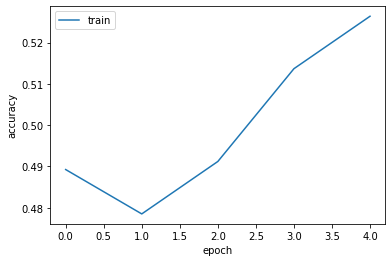

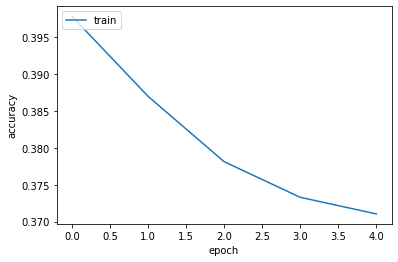

Epoch 1/5
16/16 [==============================] - 92s 6s/step - loss: 0.3732 - accuracy: 0.5195
Epoch 2/5
16/16 [==============================] - 91s 6s/step - loss: 0.3624 - accuracy: 0.5430
Epoch 3/5
16/16 [==============================] - 91s 6s/step - loss: 0.3598 - accuracy: 0.5410
Epoch 4/5
16/16 [==============================] - 91s 6s/step - loss: 0.3563 - accuracy: 0.5186
Epoch 5/5
16/16 [==============================] - 90s 6s/step - loss: 0.3524 - accuracy: 0.5576


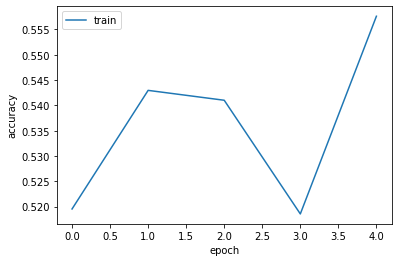

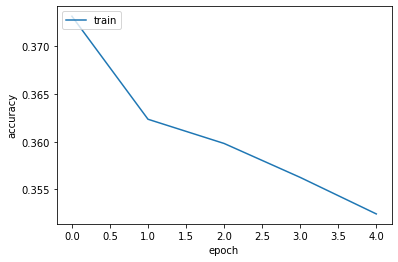

Epoch 1/5
16/16 [==============================] - 93s 6s/step - loss: 0.3769 - accuracy: 0.5342
Epoch 2/5
16/16 [==============================] - 91s 6s/step - loss: 0.3700 - accuracy: 0.5400
Epoch 3/5
16/16 [==============================] - 91s 6s/step - loss: 0.3616 - accuracy: 0.5527
Epoch 4/5
16/16 [==============================] - 92s 6s/step - loss: 0.3548 - accuracy: 0.5732
Epoch 5/5
16/16 [==============================] - 90s 6s/step - loss: 0.3549 - accuracy: 0.5742


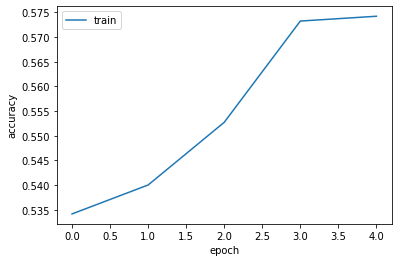

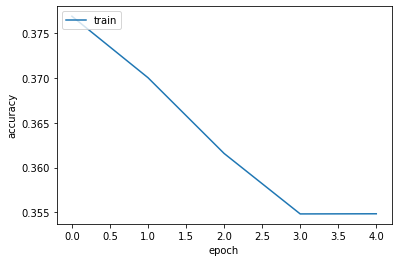

Epoch 1/5
16/16 [==============================] - 91s 6s/step - loss: 0.3578 - accuracy: 0.5449
Epoch 2/5
16/16 [==============================] - 92s 6s/step - loss: 0.3529 - accuracy: 0.5361
Epoch 3/5
16/16 [==============================] - 90s 6s/step - loss: 0.3467 - accuracy: 0.5918
Epoch 4/5
16/16 [==============================] - 92s 6s/step - loss: 0.3399 - accuracy: 0.5312
Epoch 5/5
16/16 [==============================] - 90s 6s/step - loss: 0.3336 - accuracy: 0.5498


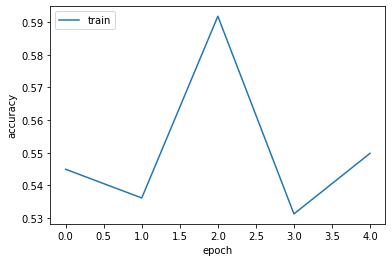

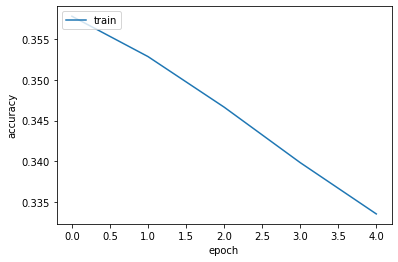

Epoch 1/5
16/16 [==============================] - 91s 6s/step - loss: 0.3586 - accuracy: 0.5615
Epoch 2/5
16/16 [==============================] - 91s 6s/step - loss: 0.3539 - accuracy: 0.5625
Epoch 3/5
16/16 [==============================] - 91s 6s/step - loss: 0.3423 - accuracy: 0.5537
Epoch 4/5
16/16 [==============================] - 91s 6s/step - loss: 0.3374 - accuracy: 0.5791
Epoch 5/5
16/16 [==============================] - 91s 6s/step - loss: 0.3330 - accuracy: 0.5723


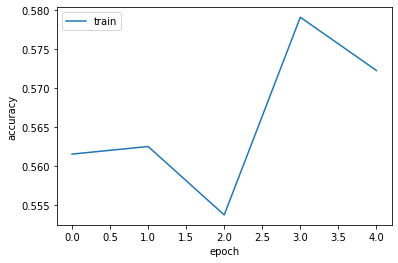

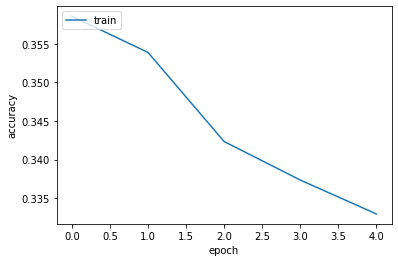

Epoch 1/5
16/16 [==============================] - 92s 6s/step - loss: 0.3531 - accuracy: 0.5254
Epoch 2/5
16/16 [==============================] - 90s 6s/step - loss: 0.3447 - accuracy: 0.5225
Epoch 3/5
16/16 [==============================] - 91s 6s/step - loss: 0.3338 - accuracy: 0.5840
Epoch 4/5
16/16 [==============================] - 90s 6s/step - loss: 0.3337 - accuracy: 0.5625
Epoch 5/5
16/16 [==============================] - 91s 6s/step - loss: 0.3219 - accuracy: 0.5771


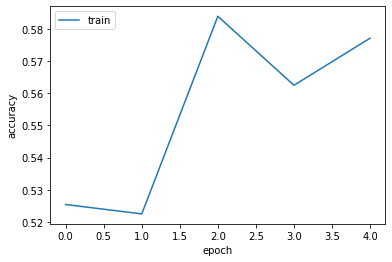

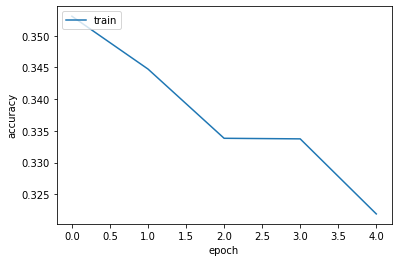

In [7]:
acc = []
for i in range(0,10):
    save_history = 'C:/Users/Felipe/Documents/DataSets/modelos/history-2_' + str(i) + '.png'
    save_loss    = 'C:/Users/Felipe/Documents/DataSets/modelos/loss-2_' + str(i) + '.png'
    save_model   = 'C:/Users/Felipe/Documents/DataSets/modelos/ModelPulm-2_' + str(i) + '.h5'
    Path         =  "C:/Users/Felipe/Documents/DataSets/Pulmonary/Data_pulmonary" + str(i) + ".pckl"
    f = open(Path, 'rb')
    [Xt,Y] = pickle.load(f)
    
    # save fit model
    history = ModelPulm.fit(x = Xt, y = Y, batch_size = 2**6, epochs = 5)
    plt.plot(history.history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(save_history, format='png')
    plt.show()
    
    # save loss model
    plt.plot(history.history['loss'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(save_loss, format='png')
    plt.show()
    
    # save accuracy
    acc.append(history.history['accuracy'][4])
    
    #save model
    ModelPulm.save(save_model)

Data_pulmonary0.pckl a Data_pulmonary3.pckl já foram usados, começar pelo Data_pulmonary4.pckl